In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import load_boston
 
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [6]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
# Посмотрим есть ли пропуски в данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
#Посмотрим основне статистики данных в датафрейме
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Видим, что данные разной размерности. Есть бинарная переменная CHAS и есть переменная TAX с максимальным значением 711

In [9]:
data.shape

(506, 14)

In [16]:
# Будем использовать линейную регрессию для тестирования качества данных
def get_score(x,y, random_seed=42, model=None):
    if model is None:
        model = LinearRegression()
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_seed )  
        model.fit(x_train, y_train)
        return model.score(x_test, y_test)

### 1) Обучим нашу модель на сырых / необработанных данных и на всех столбцах.

In [18]:
get_score(data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']], data['MEDV'])

0.7112260057484874

### 2) Посмотрим есть ли корреляции между какими-то данными

<AxesSubplot:>

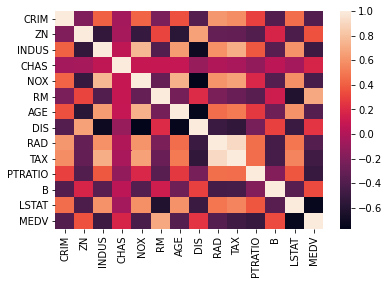

In [26]:
sns.heatmap(data.corr())

Вроде как прослеживается высокая корреляция между столбцами RAD (индекс доступности радиальных автомобильных дорог) и TAX (полная ставка налога на имущество за 10 000 долларов США). Посчитаем значение корреляции.

In [20]:
data[['RAD', 'TAX']].corr()

,RAD,TAX
RAD,1.000000,0.910228
TAX,0.910228,1.000000


### 3) Попробуем убрать столбец RAD и посмотреть какой получиться скор

In [21]:
get_score(data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']], data['MEDV'])

0.6883010754490899

In [23]:
# Попробуем убрать TAX и оставим только RAD. И посчитаем скор
get_score(data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']], data['MEDV'])

0.6983850039833566

Видим, что скор в п.1 достаточно высокий, а после исключения одного из коррелирующих столбца, значение скора упало.

### 4) Попробуем выбрать показатели, которые могут влиять на среднюю стоимость домов и посчитать скор

- CRIM - уровень преступности на душу населения
- RM - среднее количество комнат в доме
- DIS - взвешенное расстояние до пяти бостонских центров занятости
- RAD - индекс доступности радиальных автомобильных дорог
- LSTAT - % более населения низкого соц статуса

<AxesSubplot:>

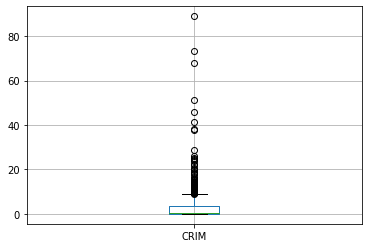

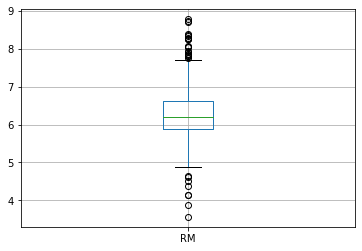

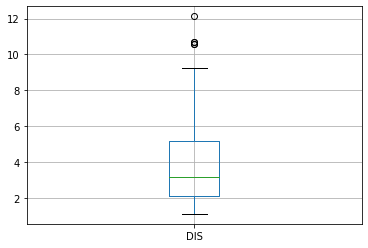

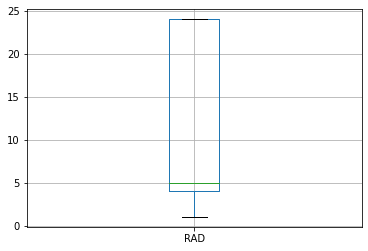

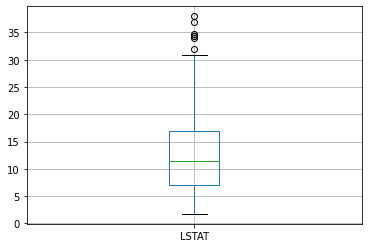

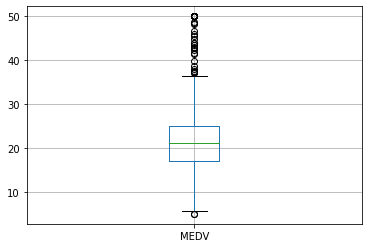

In [24]:
# Построим бок сплот, чтобы проверить наличие выбросов
df[['CRIM']].plot(kind='box', grid=True)
df[['RM']].plot(kind='box', grid=True)
df[['DIS']].plot(kind='box', grid=True)
df[['RAD']].plot(kind='box', grid=True)
df[['LSTAT']].plot(kind='box', grid=True)
df[['MEDV']].plot(kind='box', grid=True)

In [27]:
# Построим модель только на этих данных
get_score(data[['CRIM', 'RM', 'DIS', 'RAD', 'LSTAT']], data['MEDV'])

0.6075294274524525

In [33]:
# Применим StandardScaler, чтобы привести все наши x данные к одному масштабу
reg = LinearRegression()
scaler = StandardScaler()
X = data[['CRIM', 'RM', 'DIS', 'RAD', 'LSTAT']]
Y = data['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(scaler.fit_transform(X), Y, test_size=0.3, random_state=42 )
reg.fit(X_train, Y_train)
reg.score(X_test, Y_test)

0.6075294274524521

### 5) Возьмем все данные кроме TAX, применим StandardScaler и get_dummies для столбца CHAS

In [35]:
selectedColumns = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']]
X1 = pd.get_dummies (selectedColumns, columns = ['CHAS'])
Y1 = data['MEDV']

In [36]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(scaler.fit_transform(X1), Y1, test_size=0.3, random_state=42 )
reg.fit(X1_train, Y1_train)
reg.score(X1_test, Y1_test)

0.698385003983356